**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

In [27]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [44]:
df = pd.read_csv("Morphometry.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Period(day)                   20 non-null     int64  
 1   Smooth muscle/collagen ratio  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


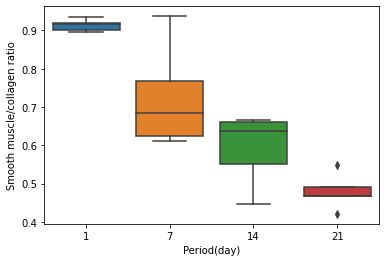

In [51]:
top_day = df['Period(day)'].value_counts().sort_values(ascending = False).head(4).index.values
top_day
ax = sns.boxplot(x="Period(day)", y="Smooth muscle/collagen ratio", 
            data=df[df['Period(day)'].isin(top_day)])


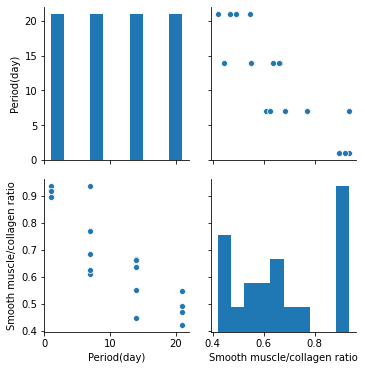

In [32]:
sns_plot = sns.pairplot(
    df[['Period(day)' , 'Smooth muscle/collagen ratio' ]])
sns_plot

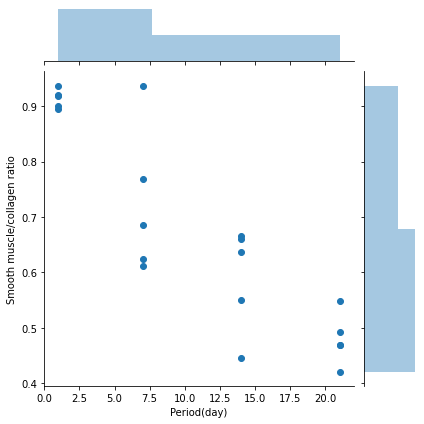

In [52]:
sns.jointplot(x='Period(day)', y='Smooth muscle/collagen ratio', 
              data=df, kind='scatter')

In [49]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [60]:
df['Period(day)'].unique()

array([ 1,  7, 14, 21], dtype=int64)

In [76]:
df.rename(columns={'Smooth muscle/collagen ratio': 'SM_CR'}, inplace=True)

In [78]:
data = []

for day in df['Period(day)'].unique():
    data.append(
        go.Box(y=df[df['Period(day)'] == day].SM_CR, 
               name= str(day))
    )
iplot(data, show_link = False)

In [92]:
testosterone = pd.read_csv("Testosterone.csv")
Testesterone.head()

,Rabbit,1,7,14,21
0,1,8.83,0.15,0.15,0.15
1,2,9.13,0.15,0.20,0.15
2,3,7.14,1.25,0.30,0.20
3,4,8.64,0.20,0.25,0.20
4,5,8.96,0.23,0.15,0.15


FileNotFoundError: [Errno 2] No such file or directory: 'plots/ST_dynamics.svg'

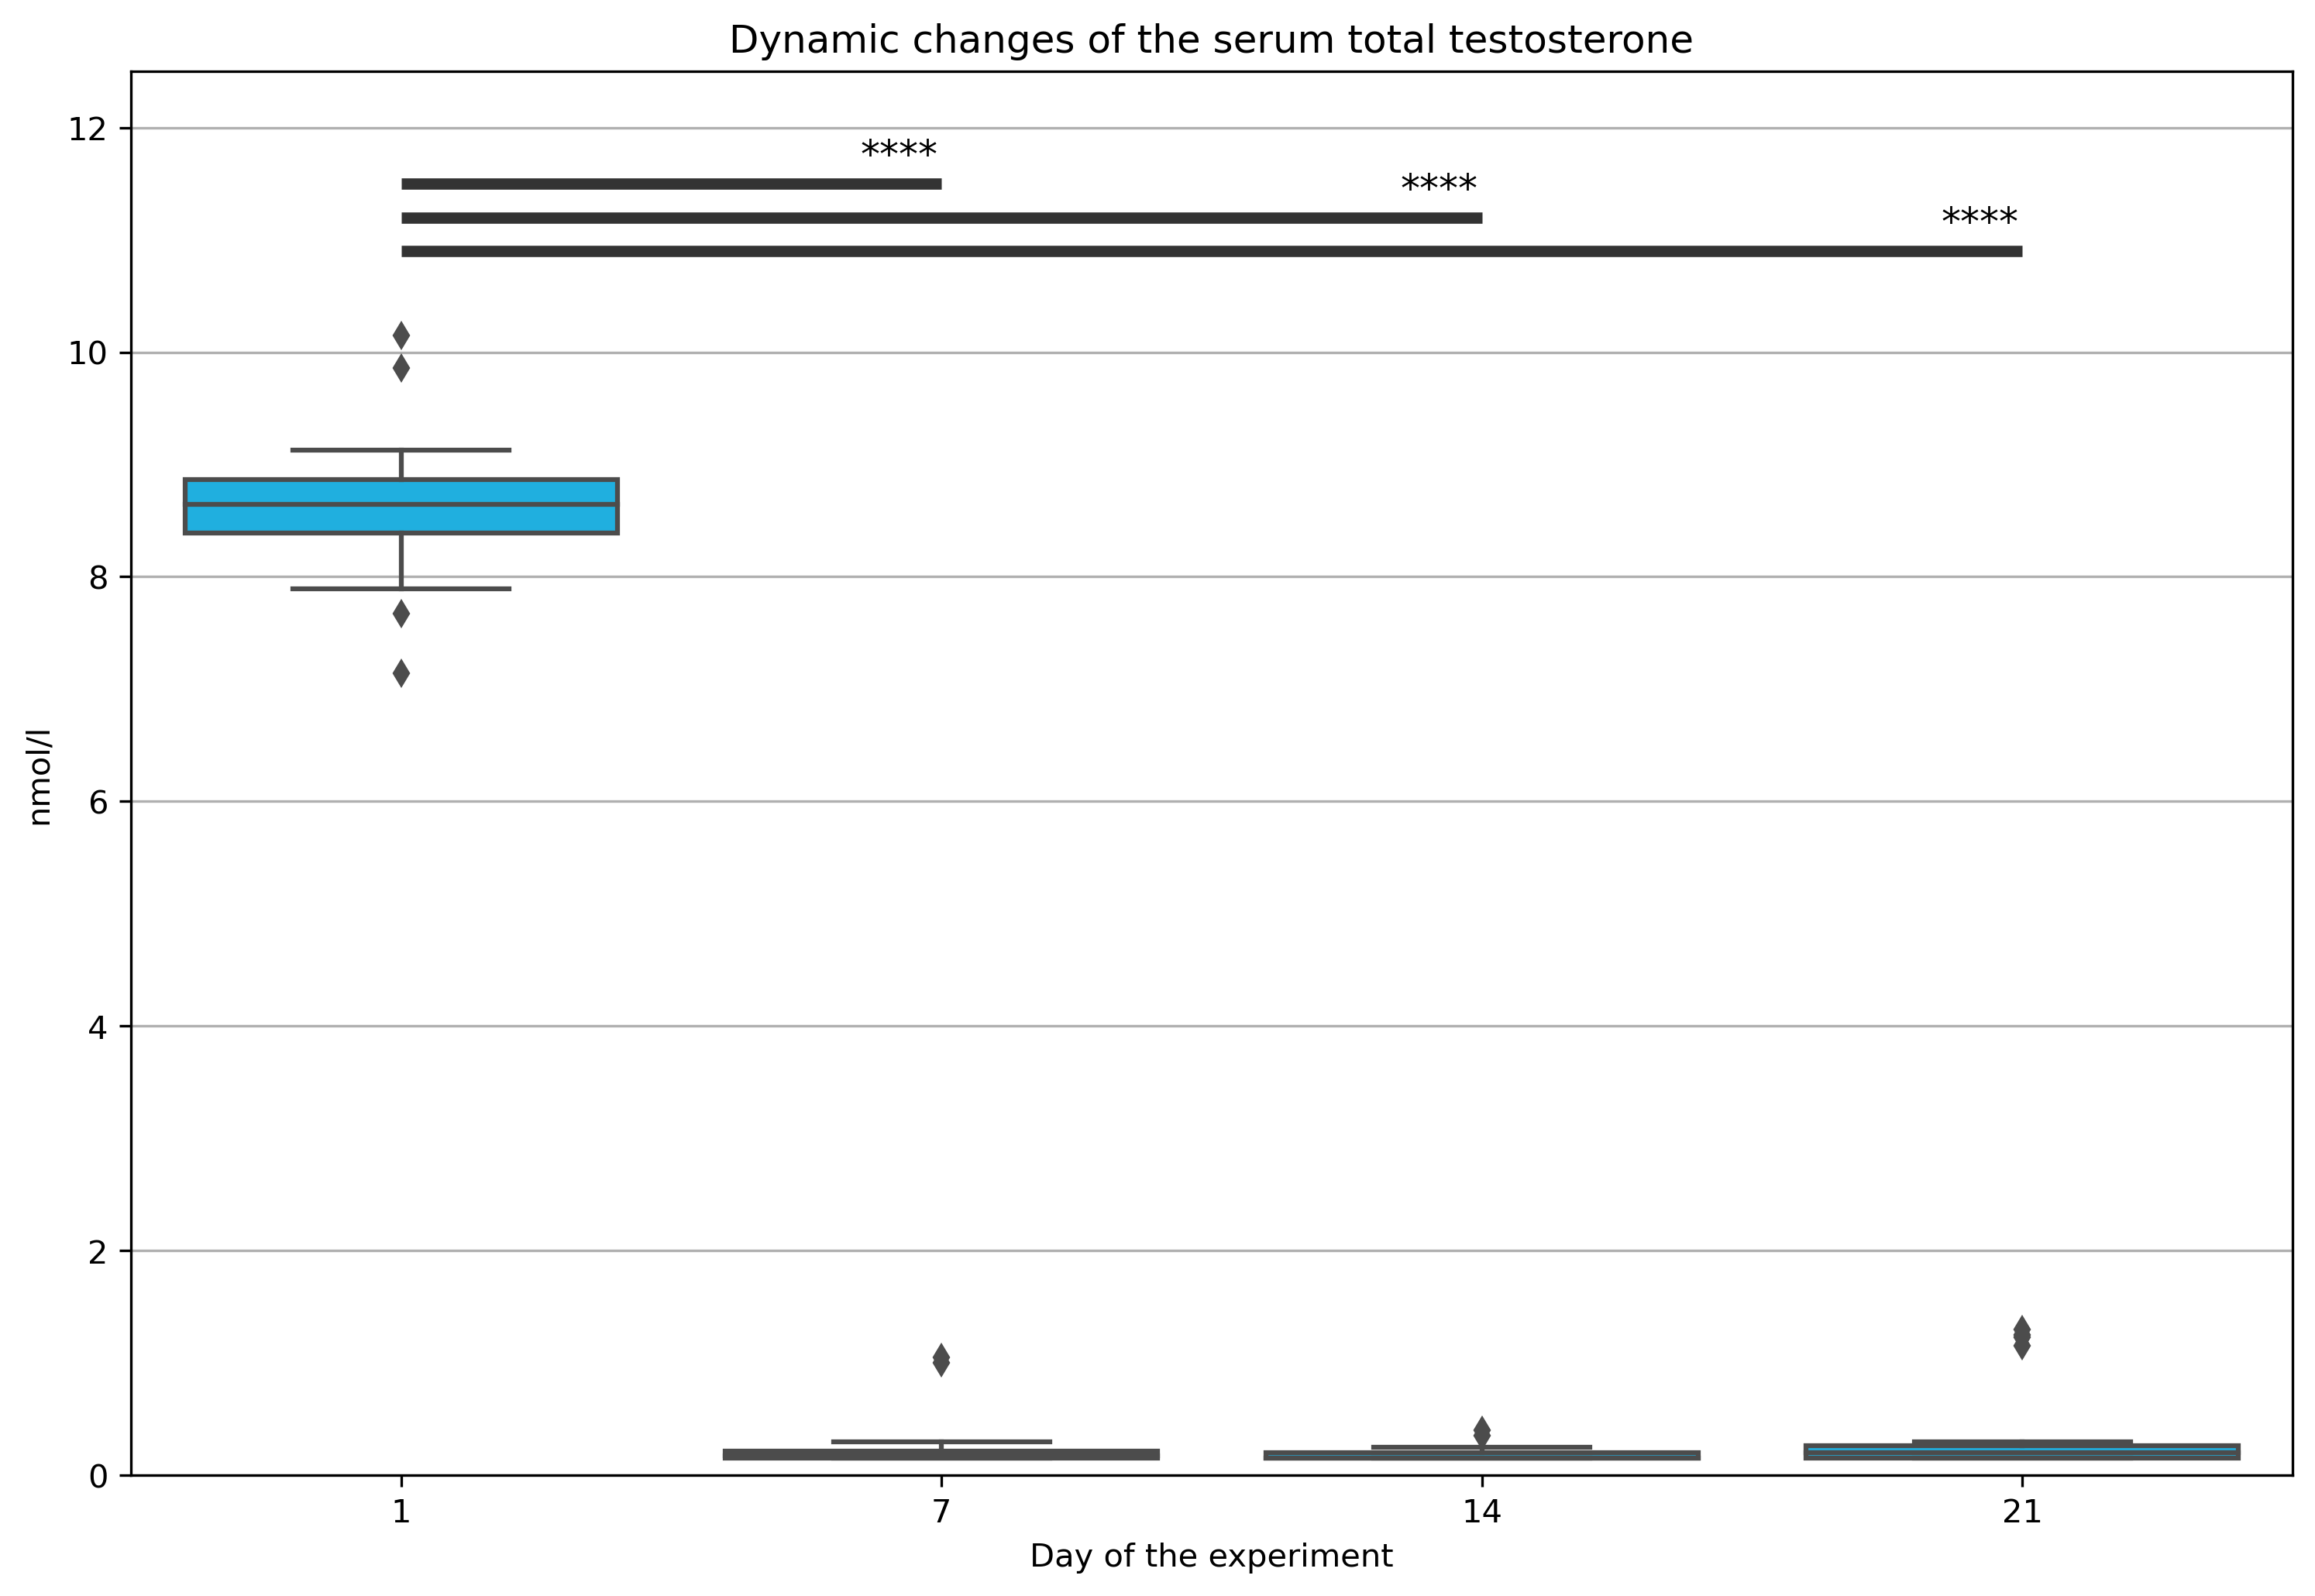

In [102]:
pal = {day: 'deepskyblue' for day in testosterone.columns[1:]}

plt.figure(figsize=(12, 8), dpi=300)

plt.grid()
sns.boxplot(
    x='variable',
    y='value',
    data=testosterone.drop('Rabbit', axis='columns').melt(), 
    palette=pal,
)

ticks, labels = plt.xticks()


days_labels = ['1', '7', '14', '21']
plt.xticks(ticks=ticks, labels=days_labels)
plt.xlabel('Day of the experiment')
plt.ylabel('nmol/l')

plt.hlines(y=11.5, xmin=0, xmax=1, linewidth=3.5, colors='#333333')
plt.hlines(y=11.2, xmin=0, xmax=2, linewidth=3.5, colors='#333333')
plt.hlines(y=10.9, xmin=0, xmax=3, linewidth=3.5, colors='#333333')

plt.text(x=1-0.15, y=11.65, s='****', fontsize=12)
plt.text(x=2-0.15, y=11.35, s='****', fontsize=12)
plt.text(x=3-0.15, y=11.05, s='****', fontsize=12)

plt.ylim(0, 12.5)

plt.title('Dynamic changes of the serum total testosterone')

plt.savefig('plots/ST_dynamics.svg')

FileNotFoundError: [Errno 2] No such file or directory: 'plots/ST_dynamics_lines.svg'

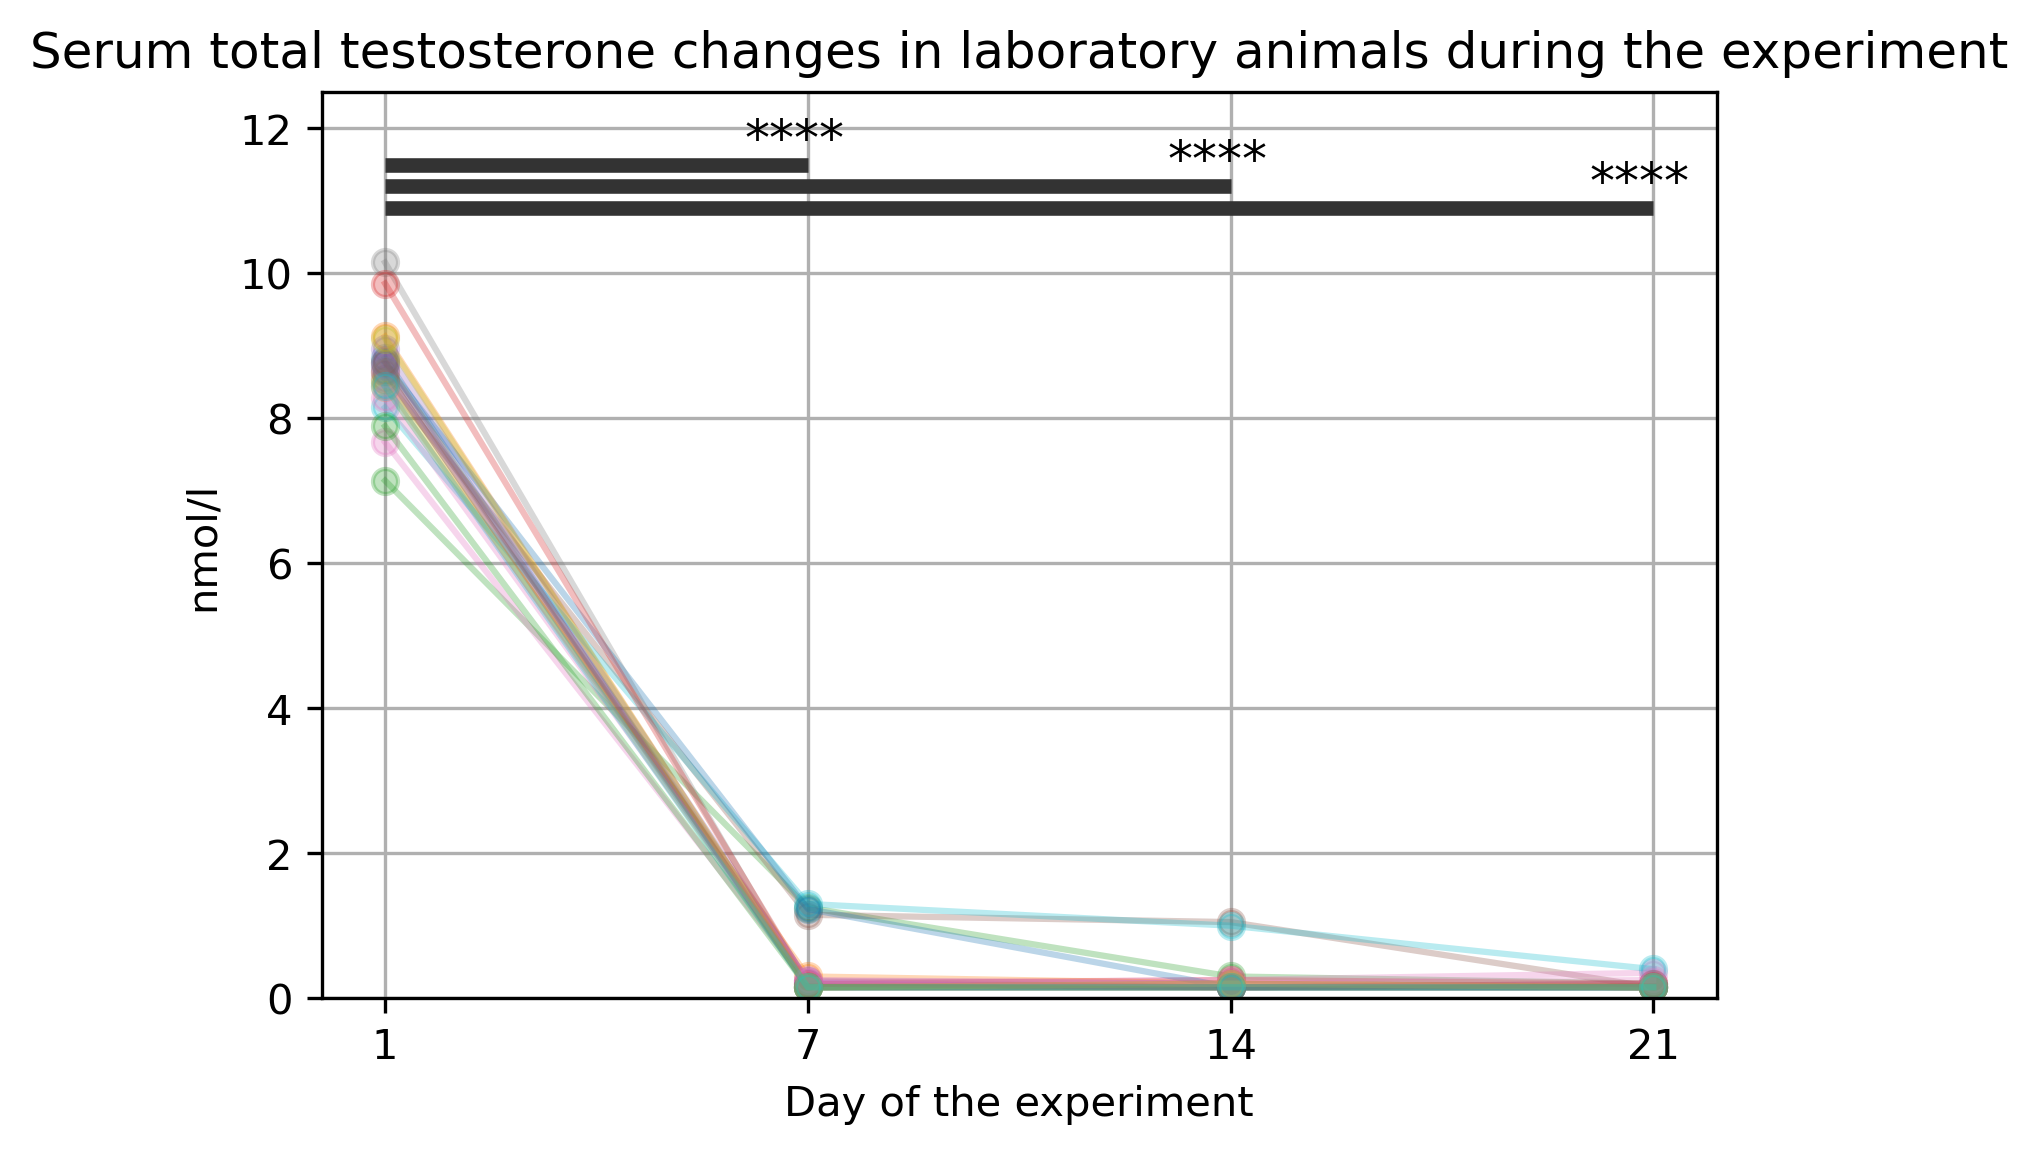

In [105]:
x = [0, 1, 2, 3]

plt.figure(figsize=(6, 4), dpi=300)
plt.grid()

for _, row in testosterone[testosterone.columns[1:]].iterrows():
    plt.plot(x, row, '-o', alpha=.3)
    
plt.xticks(ticks=x, labels=days_labels)
plt.xlabel('Day of the experiment')
plt.ylabel('nmol/l')

plt.hlines(y=11.5, xmin=0, xmax=1, linewidth=3.5, colors='#333333')
plt.hlines(y=11.2, xmin=0, xmax=2, linewidth=3.5, colors='#333333')
plt.hlines(y=10.9, xmin=0, xmax=3, linewidth=3.5, colors='#333333')

plt.text(x=1-0.15, y=11.65, s='****', fontsize=12)
plt.text(x=2-0.15, y=11.35, s='****', fontsize=12)
plt.text(x=3-0.15, y=11.05, s='****', fontsize=12)

plt.ylim(0, 12.5)

plt.title('Serum total testosterone changes in laboratory animals during the experiment')

plt.savefig('plots/ST_dynamics_lines.svg')

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).